In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install prophet

In [3]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# colab compute engine
# df = pd.read_csv('drive/MyDrive/data/Global_price_Palm_oil.csv', parse_dates=['DATE'])
# local run
df = pd.read_csv('Global_price_Palm_oil.csv', parse_dates=['DATE'])
# df = pd.read_csv('Crude_Oil_WTI_Historical_Data.csv', parse_dates=['Date'])

df.head(5)

DATE   PPOILUSDM
0 1990-01-01  230.555951
1 1990-02-01  223.945027
2 1990-03-01  236.340509
3 1990-04-01  220.639566
4 1990-05-01  232.208681

In [5]:
df.dtypes

DATE         datetime64[ns]
PPOILUSDM           float64
dtype: object

In [6]:
df = df.rename(columns={'PPOILUSDM': 'price', 'DATE': 'date'})

In [7]:
df = df[(df.date > '2000-11-30') & (df.date < '2021-12-30')]

In [8]:
df.head()

date       price
131 2000-12-01  199.178947
132 2001-01-01  191.788825
133 2001-02-01  185.065003
134 2001-03-01  210.900287
135 2001-04-01  208.963866

In [9]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [10]:
df = df.rename(columns={'date': 'ds', 'price': 'y'})

In [11]:
df.columns

Index(['ds', 'y'], dtype='object')

In [12]:
df.head()

ds           y
131 2000-12-01  199.178947
132 2001-01-01  191.788825
133 2001-02-01  185.065003
134 2001-03-01  210.900287
135 2001-04-01  208.963866

In [13]:
df.tail()

ds            y
378 2021-07-01  1010.223854
379 2021-08-01  1077.780613
380 2021-09-01  1105.978301
381 2021-10-01  1238.172857
382 2021-11-01  1279.640812

In [14]:
split_idx = df.shape[0] - 48

In [15]:
validate = df.iloc[split_idx:,:]

In [16]:
train = df.iloc[:split_idx,:]

In [17]:
validate.shape, train.shape

((48, 2), (204, 2))

In [18]:
m = Prophet()

In [19]:
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.60475


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81        319.19   0.000557065       75.5336   7.185e-06       0.001      152  LS failed, Hessian reset 
      99       319.237   1.24509e-05       74.1093      0.4538      0.4538      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       319.596    0.00235474       80.0558   2.317e-05       0.001      272  LS failed, Hessian reset 
     199       319.942   1.43542e-05       84.2351      0.4424      0.4424      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       319.972   5.18323e-05       70.4447   6.169e-07       0.001      387  LS failed, Hessian reset 
     253       319.977   7.29116e-06       76.9165   7.592e-08       0.001      469  LS failed, Hessian reset 
     275       319.977   3.57374e-09       86.1671      0.1309      0.1309      496   
Optimization termin

In [20]:
future = m.make_future_dataframe(periods=len(validate))

In [21]:
forecast = m.predict(future)

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2000-12-01  222.443544   26.528158  358.091638   222.443544   222.443544   
1 2001-01-01  228.060266   25.696510  389.315799   228.060266   228.060266   
2 2001-02-01  233.676987   52.837416  389.293731   233.676987   233.676987   
3 2001-03-01  238.750155   95.511466  438.382619   238.750155   238.750155   
4 2001-04-01  244.366877   98.199944  443.773004   244.366877   244.366877   

   additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0      -24.935821            -24.935821            -24.935821 -24.935821   
1      -12.959363            -12.959363            -12.959363 -12.959363   
2      -17.508423            -17.508423            -17.508423 -17.508423   
3       24.660970             24.660970             24.660970  24.660970   
4       24.028975             24.028975             24.028975  24.028975   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -24.935821    -24.935821                   0.0   
1    -12.959363    -12.959363                   0.0   
2    -17.508423    -17.508423                   0.0   
3     24.660970     24.660970                   0.0   
4     24.028975     24.028975                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  197.507723  
1                         0.0                         0.0  215.100903  
2                         0.0                         0.0  216.168565  
3                         0.0                         0.0  263.411126  
4                         0.0                         0.0  268.395852

In [23]:
validate.shape

(48, 2)

In [24]:
forecast.shape

(252, 16)

In [25]:
timeseries_evaluation_metrics_func(validate.y,forecast[split_idx:].yhat)

MSE is : 32381.97812533771
MAE is : 150.14026394102686
RMSE is : 179.94993227377918
MAPE is : 22.225673340812925
R2 is : 0.37079119618643974



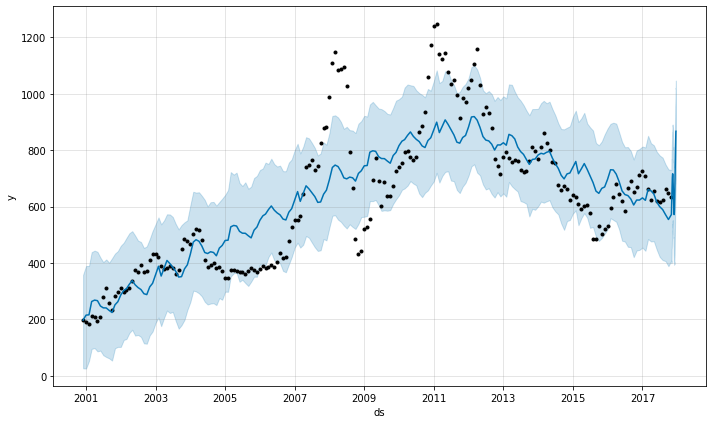

In [26]:
fig1 = m.plot(forecast)

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


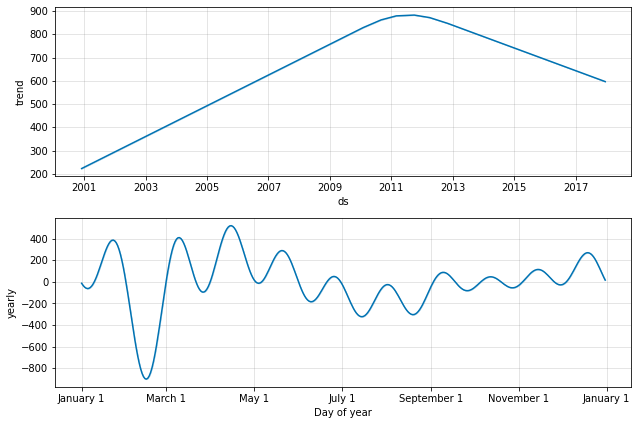

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
df.tail()

ds            y
378 2021-07-01  1010.223854
379 2021-08-01  1077.780613
380 2021-09-01  1105.978301
381 2021-10-01  1238.172857
382 2021-11-01  1279.640812

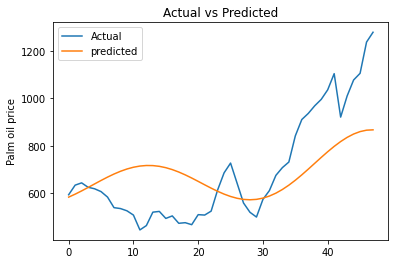

In [29]:
plt.plot( list(validate.y))
plt.plot( list(forecast[split_idx:].yhat))
plt.title("Actual vs Predicted")
plt.ylabel("Palm oil price")
plt.legend(('Actual','predicted'))
plt.show()

Grid search to find hyperparameters

In [30]:
def model_test(yearly_seasonality, changepoint_prior_scale, month_fourier):
    
    m = Prophet(
yearly_seasonality=yearly_seasonality, 
changepoint_prior_scale=changepoint_prior_scale)

    m.fit(train)
    future = m.make_future_dataframe(periods=len(validate))
    forecast = m.predict(future)

    return metrics.r2_score(
list(validate['y']),
list(forecast.loc[split_idx:,'yhat'] ))

In [31]:
# Setting the grid
yearly_seas = [ 5, 10, 30, 50]
changepoint_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

# Looping through the grid
grid_results = []
for ys in yearly_seas:
    for c in changepoint_prior_scale:
        for mf in month_fourier:
            r2=model_test(ys,c,mf)
            print([ys,c,mf,r2])
            grid_results.append([ys,c,mf,r2])

# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(3, ascending=False)

ys, c, mf, r2 = list(benchmark.iloc[0,:])

# print out the best hyperparameters
print(f"Best hyperparameters:\n\t Yearly_season={ys}\n\t Change_points_prior_scale: {c}\n\t Month fourier: {mf} ")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  co

Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       335.048    0.00762455       92.7078   0.0001625       0.001      153  LS failed, Hessian reset 
      99       335.653    0.00443709       47.9808      0.8963      0.8963      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       335.996   0.000395665       47.0345   7.694e-06       0.001      329  LS failed, Hessian reset 
     199       336.036   8.27627e-05       37.1666           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       336.047   2.58629e-05       42.0782   6.447e-07       0.001      527  LS failed, Hessian reset 
     299       336.048   1.72677e-07       38.5634      0.2903      0.2903      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[5, 0.1, 5, -0.45011449801028625]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       335.048    0.00762455       92.7078   0.0001625       0.001      153  LS failed, Hessian reset 
      99       335.653    0.00443709       47.9808      0.8963      0.8963      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       335.996   0.000395665       47.0345   7.694e-06       0.001      329  LS failed, Hessian reset 
     199       336.036   8.27627e-05       37.1666           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       336.047   2.58629e-05       42.0782   6.447e-07       0.001      527  LS failed, Hessian reset 
     299       336.048   1.72677e-07       38.5634      0.2903      0.2903      548   
    Iter      log prob        ||dx||      ||grad||     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.1, 10, -0.45011449801028625]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       335.048    0.00762455       92.7078   0.0001625       0.001      153  LS failed, Hessian reset 
      99       335.653    0.00443709       47.9808      0.8963      0.8963      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       335.996   0.000395665       47.0345   7.694e-06       0.001      329  LS failed, Hessian reset 
     199       336.036   8.27627e-05       37.1666           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       336.047   2.58629e-05       42.0782   6.447e-07       0.001      527  LS failed, Hessian reset 
     299       336.048   1.72677e-07       38.5634      0.2903      0.2903      548   
    Iter      log prob        ||dx||      ||grad||    

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.1, 30, -0.45011449801028625]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       335.048    0.00762455       92.7078   0.0001625       0.001      153  LS failed, Hessian reset 
      99       335.653    0.00443709       47.9808      0.8963      0.8963      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       335.996   0.000395665       47.0345   7.694e-06       0.001      329  LS failed, Hessian reset 
     199       336.036   8.27627e-05       37.1666           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       336.047   2.58629e-05       42.0782   6.447e-07       0.001      527  LS failed, Hessian reset 
     299       336.048   1.72677e-07       38.5634      0.2903      0.2903      548   
    Iter      log prob        ||dx||      ||grad||    

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.1, 50, -0.45011449801028625]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       354.368     0.0193529       18.6425           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       356.553   0.000496568       13.1763      0.5663      0.5663      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294        358.58    0.00157025       38.4324   7.255e-05       0.001      399  LS failed, Hessian reset 
     299       358.634     0.0153875       14.5905           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       358.804    0.00288811       21.1144   0.0001226       0.001      489  LS failed, Hessian reset 
     399       358.955    0.00582846       25.4941           1           

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.3, 5, -0.19172442143855428]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       354.368     0.0193529       18.6425           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       356.553   0.000496568       13.1763      0.5663      0.5663      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294        358.58    0.00157025       38.4324   7.255e-05       0.001      399  LS failed, Hessian reset 
     299       358.634     0.0153875       14.5905           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       358.804    0.00288811       21.1144   0.0001226       0.001      489  LS failed, Hessian reset 
     399       358.955    0.00582846       25.4941           1           1

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.3, 10, -0.19172442143855428]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       354.368     0.0193529       18.6425           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       356.553   0.000496568       13.1763      0.5663      0.5663      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294        358.58    0.00157025       38.4324   7.255e-05       0.001      399  LS failed, Hessian reset 
     299       358.634     0.0153875       14.5905           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       358.804    0.00288811       21.1144   0.0001226       0.001      489  LS failed, Hessian reset 
     399       358.955    0.00582846       25.4941           1           

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.3, 30, -0.19172442143855428]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       354.368     0.0193529       18.6425           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       356.553   0.000496568       13.1763      0.5663      0.5663      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294        358.58    0.00157025       38.4324   7.255e-05       0.001      399  LS failed, Hessian reset 
     299       358.634     0.0153875       14.5905           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       358.804    0.00288811       21.1144   0.0001226       0.001      489  LS failed, Hessian reset 
     399       358.955    0.00582846       25.4941           1           

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.3, 50, -0.19172442143855428]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       368.183     0.0141704       25.0553           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       385.122      0.410176       144.467           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       391.419    0.00491279       10.8944           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       394.823    0.00287784       12.3431           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       397.201     0.0219815       47.6394           1           1      593   
    Iter      log prob       

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.5, 5, -0.1622546256358839]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       368.183     0.0141704       25.0553           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       385.122      0.410176       144.467           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       391.419    0.00491279       10.8944           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       394.823    0.00287784       12.3431           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       397.201     0.0219815       47.6394           1           1      593   
    Iter      log prob        |

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.5, 10, -0.1622546256358839]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       368.183     0.0141704       25.0553           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       385.122      0.410176       144.467           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       391.419    0.00491279       10.8944           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       394.823    0.00287784       12.3431           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       397.201     0.0219815       47.6394           1           1      593   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.5, 30, -0.1622546256358839]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       368.183     0.0141704       25.0553           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       385.122      0.410176       144.467           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       391.419    0.00491279       10.8944           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       394.823    0.00287784       12.3431           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       397.201     0.0219815       47.6394           1           1      593   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[5, 0.5, 50, -0.1622546256358839]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       339.512    0.00215224       37.5685      0.8662      0.8662      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       339.654   0.000131596       41.7325    3.75e-06       0.001      201  LS failed, Hessian reset 
     199       339.669   0.000112218       43.3791      0.5132      0.5132      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       339.708   0.000273845         47.09   6.832e-06       0.001      341  LS failed, Hessian reset 
     264       339.718   1.10953e-05       40.9992   2.763e-07       0.001      450  LS failed, Hessian reset 
     299       339.721   7.57172e-06       34.7394           1           1      497   
    Iter      log prob        ||dx||      ||grad||     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.1, 5, 0.44673938433981786]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       339.512    0.00215224       37.5685      0.8662      0.8662      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       339.654   0.000131596       41.7325    3.75e-06       0.001      201  LS failed, Hessian reset 
     199       339.669   0.000112218       43.3791      0.5132      0.5132      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       339.708   0.000273845         47.09   6.832e-06       0.001      341  LS failed, Hessian reset 
     264       339.718   1.10953e-05       40.9992   2.763e-07       0.001      450  LS failed, Hessian reset 
     299       339.721   7.57172e-06       34.7394           1           1      497   
    Iter      log prob        ||dx||      ||grad||     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.1, 10, 0.44673938433981786]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       339.512    0.00215224       37.5685      0.8662      0.8662      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       339.654   0.000131596       41.7325    3.75e-06       0.001      201  LS failed, Hessian reset 
     199       339.669   0.000112218       43.3791      0.5132      0.5132      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       339.708   0.000273845         47.09   6.832e-06       0.001      341  LS failed, Hessian reset 
     264       339.718   1.10953e-05       40.9992   2.763e-07       0.001      450  LS failed, Hessian reset 
     299       339.721   7.57172e-06       34.7394           1           1      497   
    Iter      log prob        ||dx||      ||grad||    

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.1, 30, 0.44673938433981786]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       339.512    0.00215224       37.5685      0.8662      0.8662      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       339.654   0.000131596       41.7325    3.75e-06       0.001      201  LS failed, Hessian reset 
     199       339.669   0.000112218       43.3791      0.5132      0.5132      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       339.708   0.000273845         47.09   6.832e-06       0.001      341  LS failed, Hessian reset 
     264       339.718   1.10953e-05       40.9992   2.763e-07       0.001      450  LS failed, Hessian reset 
     299       339.721   7.57172e-06       34.7394           1           1      497   
    Iter      log prob        ||dx||      ||grad||    

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.1, 50, 0.44673938433981786]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       358.528   0.000387264       23.1388       0.135      0.0135      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       360.835   0.000949465       11.5022      0.8165      0.8165      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       363.019     0.0035099       19.3086           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       364.945     0.0628215       19.8539           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471        367.39   0.000260262       14.3455   1.238e-05       0.001      613  LS failed, Hessian reset 
     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.3, 5, 0.7131744793527358]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       358.528   0.000387264       23.1388       0.135      0.0135      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       360.835   0.000949465       11.5022      0.8165      0.8165      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       363.019     0.0035099       19.3086           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       364.945     0.0628215       19.8539           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471        367.39   0.000260262       14.3455   1.238e-05       0.001      613  LS failed, Hessian reset 
     49

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.3, 10, 0.7131744793527358]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       358.528   0.000387264       23.1388       0.135      0.0135      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       360.835   0.000949465       11.5022      0.8165      0.8165      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       363.019     0.0035099       19.3086           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       364.945     0.0628215       19.8539           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471        367.39   0.000260262       14.3455   1.238e-05       0.001      613  LS failed, Hessian reset 
     4

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.3, 30, 0.7131744793527358]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       358.528   0.000387264       23.1388       0.135      0.0135      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       360.835   0.000949465       11.5022      0.8165      0.8165      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       363.019     0.0035099       19.3086           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       364.945     0.0628215       19.8539           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471        367.39   0.000260262       14.3455   1.238e-05       0.001      613  LS failed, Hessian reset 
     4

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.3, 50, 0.7131744793527358]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.67     0.0235539       128.305      0.7258     0.07258      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.742     0.0239261       69.8624      0.7668      0.7668      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       393.021     0.0831654       78.9526           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       398.695     0.0761212       59.6529      0.2729           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       401.648    0.00383092       17.2949           1           1      565   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.5, 5, 0.769185473881464]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.67     0.0235539       128.305      0.7258     0.07258      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.742     0.0239261       69.8624      0.7668      0.7668      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       393.021     0.0831654       78.9526           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       398.695     0.0761212       59.6529      0.2729           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       401.648    0.00383092       17.2949           1           1      565   
    Iter      log prob        ||

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.5, 10, 0.769185473881464]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.67     0.0235539       128.305      0.7258     0.07258      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.742     0.0239261       69.8624      0.7668      0.7668      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       393.021     0.0831654       78.9526           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       398.695     0.0761212       59.6529      0.2729           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       401.648    0.00383092       17.2949           1           1      565   
    Iter      log prob        |

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.5, 30, 0.769185473881464]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.67     0.0235539       128.305      0.7258     0.07258      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.742     0.0239261       69.8624      0.7668      0.7668      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       393.021     0.0831654       78.9526           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       398.695     0.0761212       59.6529      0.2729           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       401.648    0.00383092       17.2949           1           1      565   
    Iter      log prob        |

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[10, 0.5, 50, 0.769185473881464]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       348.571     0.0010592       31.4206      0.6637      0.6637      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       350.372   0.000720858       39.6097   1.823e-05       0.001      250  LS failed, Hessian reset 
     199       350.391   2.96266e-06       38.4355      0.2499       0.683      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       350.392   9.10713e-09       35.2961       0.126       0.126      317   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.1, 5, -2.699196267292269]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       348.571     0.0010592       31.4206      0.6637      0.6637      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       350.372   0.000720858       39.6097   1.823e-05       0.001      250  LS failed, Hessian reset 
     199       350.391   2.96266e-06       38.4355      0.2499       0.683      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       350.392   9.10713e-09       35.2961       0.126       0.126      317   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.1, 10, -2.699196267292269]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       348.571     0.0010592       31.4206      0.6637      0.6637      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       350.372   0.000720858       39.6097   1.823e-05       0.001      250  LS failed, Hessian reset 
     199       350.391   2.96266e-06       38.4355      0.2499       0.683      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       350.392   9.10713e-09       35.2961       0.126       0.126      317   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.1, 30, -2.699196267292269]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       348.571     0.0010592       31.4206      0.6637      0.6637      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       350.372   0.000720858       39.6097   1.823e-05       0.001      250  LS failed, Hessian reset 
     199       350.391   2.96266e-06       38.4355      0.2499       0.683      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       350.392   9.10713e-09       35.2961       0.126       0.126      317   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.1, 50, -2.699196267292269]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       369.051    0.00745951       34.5479      0.5906           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       372.781     0.0107392       53.8763           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       377.183    0.00248948       20.2461      0.7673      0.7673      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       383.304    0.00186907       39.5799      0.5854      0.5854      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       385.595    0.00038787       10.4798       0.303       0.303      592   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.3, 5, -150.9240556798215]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       369.051    0.00745951       34.5479      0.5906           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       372.781     0.0107392       53.8763           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       377.183    0.00248948       20.2461      0.7673      0.7673      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       383.304    0.00186907       39.5799      0.5854      0.5854      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       385.595    0.00038787       10.4798       0.303       0.303      592   
    Iter      log prob        |

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.3, 10, -150.9240556798215]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       369.051    0.00745951       34.5479      0.5906           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       372.781     0.0107392       53.8763           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       377.183    0.00248948       20.2461      0.7673      0.7673      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       383.304    0.00186907       39.5799      0.5854      0.5854      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       385.595    0.00038787       10.4798       0.303       0.303      592   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.3, 30, -150.9240556798215]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       369.051    0.00745951       34.5479      0.5906           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       372.781     0.0107392       53.8763           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       377.183    0.00248948       20.2461      0.7673      0.7673      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       383.304    0.00186907       39.5799      0.5854      0.5854      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       385.595    0.00038787       10.4798       0.303       0.303      592   
    Iter      log prob        

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[30, 0.3, 50, -150.9240556798215]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       374.959     0.0182829       30.0392           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.758      0.046699       114.255      0.7474      0.7474      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       397.316     0.0132419       41.8501           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       402.791    0.00671066       42.9847      0.8246      0.8246      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       411.997    0.00169898       23.3898           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[30, 0.5, 5, -1045.1062211670671]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       374.959     0.0182829       30.0392           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.758      0.046699       114.255      0.7474      0.7474      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       397.316     0.0132419       41.8501           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       402.791    0.00671066       42.9847      0.8246      0.8246      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       411.997    0.00169898       23.3898           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[30, 0.5, 10, -1045.1062211670671]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       374.959     0.0182829       30.0392           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.758      0.046699       114.255      0.7474      0.7474      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       397.316     0.0132419       41.8501           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       402.791    0.00671066       42.9847      0.8246      0.8246      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       411.997    0.00169898       23.3898           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[30, 0.5, 30, -1045.1062211670671]
Initial log joint probability = -7.60475


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       374.959     0.0182829       30.0392           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.758      0.046699       114.255      0.7474      0.7474      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       397.316     0.0132419       41.8501           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       402.791    0.00671066       42.9847      0.8246      0.8246      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       411.997    0.00169898       23.3898           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[30, 0.5, 50, -1045.1062211670671]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        353.36     0.0174166       50.6437           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       363.977    0.00980504       72.8907      0.4678      0.4678      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       368.386    1.6047e-05        34.236       1.274      0.1274      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       368.551   1.21682e-07       31.2134      0.1905      0.1905      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       368.551   3.23721e-09       39.4486    0.009955           1      498   
Optimization terminated norma

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.1, 5, -3.420265943764794]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        353.36     0.0174166       50.6437           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       363.977    0.00980504       72.8907      0.4678      0.4678      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       368.386    1.6047e-05        34.236       1.274      0.1274      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       368.551   1.21682e-07       31.2134      0.1905      0.1905      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       368.551   3.23721e-09       39.4486    0.009955           1      498   
Optimization terminated normall

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.1, 10, -3.420265943764794]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        353.36     0.0174166       50.6437           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       363.977    0.00980504       72.8907      0.4678      0.4678      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       368.386    1.6047e-05        34.236       1.274      0.1274      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       368.551   1.21682e-07       31.2134      0.1905      0.1905      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       368.551   3.23721e-09       39.4486    0.009955           1      498   
Optimization terminated normal

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.1, 30, -3.420265943764794]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        353.36     0.0174166       50.6437           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       363.977    0.00980504       72.8907      0.4678      0.4678      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       368.386    1.6047e-05        34.236       1.274      0.1274      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       368.551   1.21682e-07       31.2134      0.1905      0.1905      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       368.551   3.23721e-09       39.4486    0.009955           1      498   
Optimization terminated normal

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.1, 50, -3.420265943764794]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       370.282     0.0099929       55.2004        0.55        0.55      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       386.712     0.0116364       38.7946           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       389.566    0.00265451       21.8221           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       390.816     0.0004233       12.0634           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       391.182   0.000439768        25.173   1.357e-05       0.001      577  LS failed, Hessian reset 
     4

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.3, 5, -7.554604991263442]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       370.282     0.0099929       55.2004        0.55        0.55      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       386.712     0.0116364       38.7946           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       389.566    0.00265451       21.8221           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       390.816     0.0004233       12.0634           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       391.182   0.000439768        25.173   1.357e-05       0.001      577  LS failed, Hessian reset 
     49

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.3, 10, -7.554604991263442]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       370.282     0.0099929       55.2004        0.55        0.55      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       386.712     0.0116364       38.7946           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       389.566    0.00265451       21.8221           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       390.816     0.0004233       12.0634           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       391.182   0.000439768        25.173   1.357e-05       0.001      577  LS failed, Hessian reset 
     4

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.3, 30, -7.554604991263442]
Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       370.282     0.0099929       55.2004        0.55        0.55      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       386.712     0.0116364       38.7946           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       389.566    0.00265451       21.8221           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       390.816     0.0004233       12.0634           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       391.182   0.000439768        25.173   1.357e-05       0.001      577  LS failed, Hessian reset 
     4

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with da

[50, 0.3, 50, -7.554604991263442]
Initial log joint probability = -7.60475


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        386.21     0.0267259       62.2158           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       395.987     0.0264551       82.0381           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       399.716     0.0322029       29.8972           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       405.068    0.00914678       71.9179      0.4284      0.4284      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       407.782     0.0591836       76.8367           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[50, 0.5, 5, -93.14723425066113]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        386.21     0.0267259       62.2158           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       395.987     0.0264551       82.0381           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       399.716     0.0322029       29.8972           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       405.068    0.00914678       71.9179      0.4284      0.4284      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       407.782     0.0591836       76.8367           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[50, 0.5, 10, -93.14723425066113]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        386.21     0.0267259       62.2158           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       395.987     0.0264551       82.0381           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       399.716     0.0322029       29.8972           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       405.068    0.00914678       71.9179      0.4284      0.4284      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       407.782     0.0591836       76.8367           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[50, 0.5, 30, -93.14723425066113]


/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        386.21     0.0267259       62.2158           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       395.987     0.0264551       82.0381           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       399.716     0.0322029       29.8972           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       405.068    0.00914678       71.9179      0.4284      0.4284      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       407.782     0.0591836       76.8367           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


[50, 0.5, 50, -93.14723425066113]
Best hyperparameters:
	 Yearly_season=10.0
	 Change_points_prior_scale: 0.5
	 Month fourier: 5.0 


In [32]:
# print out the best hyperparameters
print(f"Best hyperparameters:\n\t Yearly_season={ys}\n\t Change_points_prior_scale: {c}\n\t Month fourier: {mf} ")

Best hyperparameters:
	 Yearly_season=10.0
	 Change_points_prior_scale: 0.5
	 Month fourier: 5.0 


In [33]:
# Fit the Prophet with those best hyperparameters
m = Prophet(yearly_seasonality=ys, changepoint_prior_scale=c)
    
m.fit(train)

future = m.make_future_dataframe(periods=len(validate))

forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.60475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.67     0.0235539       128.305      0.7258     0.07258      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       384.742     0.0239261       69.8624      0.7668      0.7668      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       393.021     0.0831654       78.9526           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       398.695     0.0761212       59.6529      0.2729           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       401.648    0.00383092       17.2949           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


### Evaluation metric

In [34]:
timeseries_evaluation_metrics_func(validate.y,forecast[split_idx:].yhat)

MSE is : 11878.776791551854
MAE is : 79.52574044123038
RMSE is : 108.98980131898514
MAPE is : 10.425314211687294
R2 is : 0.769185473881464



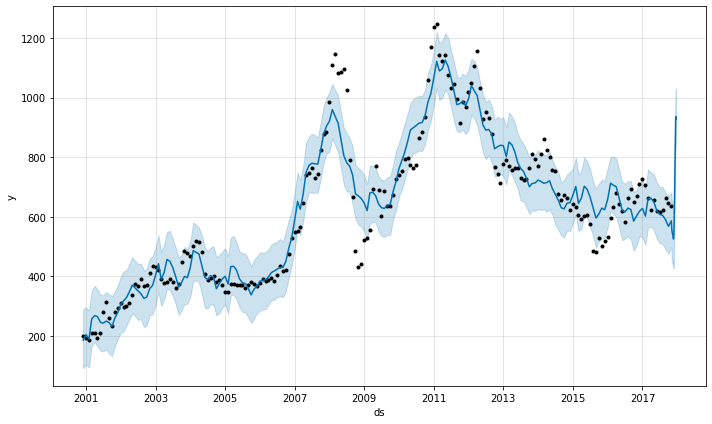

In [35]:
fig1 = m.plot(forecast)

/Users/wismineffendi/opt/anaconda3/envs/prophet/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


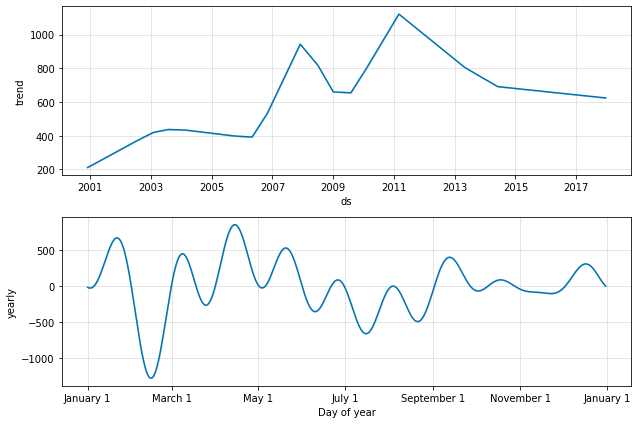

In [36]:
fig2 = m.plot_components(forecast)

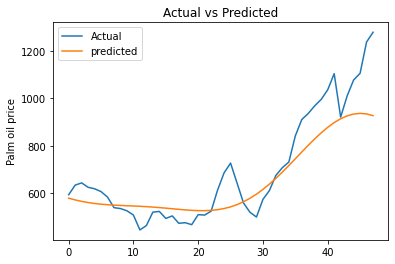

In [37]:
plt.plot( list(validate.y))
plt.plot( list(forecast[split_idx:].yhat))
plt.title("Actual vs Predicted")
plt.ylabel("Palm oil price")
plt.legend(('Actual','predicted'))
plt.show()